# Load the Dataset

In [1]:
from tensorflow.keras.datasets import cifar10


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Build the model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Rescaling


model = Sequential([
    Rescaling(1./255, input_shape=(32, 32, 3)),
    Conv2D(32, 3, padding="same", activation="relu"),
    Conv2D(32, 3, padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, 3, padding="same", activation="relu"),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

epochs = 30

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=64,
)

2022-05-31 10:55:19.414887: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 10:55:19.446817: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 10:55:19.447629: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 10:55:19.448737: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/30


2022-05-31 10:55:24.043622: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


782/782 [==============================] - 11s 8ms/step - loss: 1.3713 - accuracy: 0.5065 - val_loss: 1.0902 - val_accuracy: 0.6244
Epoch 2/30
782/782 [==============================] - 4s 6ms/step - loss: 0.9214 - accuracy: 0.6755 - val_loss: 0.8700 - val_accuracy: 0.6945
Epoch 3/30
782/782 [==============================] - 4s 6ms/step - loss: 0.7358 - accuracy: 0.7420 - val_loss: 0.8044 - val_accuracy: 0.7226
Epoch 4/30
782/782 [==============================] - 4s 6ms/step - loss: 0.5907 - accuracy: 0.7940 - val_loss: 0.8090 - val_accuracy: 0.7282
Epoch 5/30
782/782 [==============================] - 5s 6ms/step - loss: 0.4632 - accuracy: 0.8379 - val_loss: 0.7819 - val_accuracy: 0.7444
Epoch 6/30
782/782 [==============================] - 5s 6ms/step - loss: 0.3445 - accuracy: 0.8794 - val_loss: 0.8780 - val_accuracy: 0.7359
Epoch 7/30
782/782 [==============================] - 5s 7ms/step - loss: 0.2437 - accuracy: 0.9147 - val_loss: 0.9509 - val_accuracy: 0.7447
Epoch 8/30
782/7

# Visualize the Results


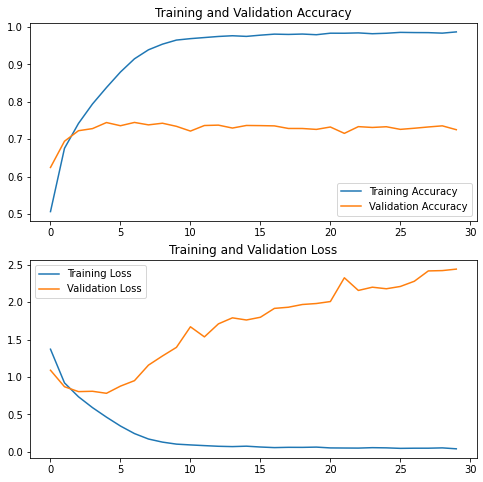

In [3]:

import matplotlib.pyplot as plt


def plot_learning_curves():
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(range(epochs), accuracy, label='Training Accuracy')
    plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(range(epochs), loss, label='Training Loss')
    plt.plot(range(epochs), val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')
    plt.show()

plot_learning_curves()

# Reduce Overfitting with Dropout


In [4]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Rescaling(1./255, input_shape=(32, 32, 3)),
    Conv2D(32, 3, padding="same", activation="relu"),
    Conv2D(32, 3, padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(64, 3, padding="same", activation="relu"),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

epochs = 30

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=64,
)

2022-05-31 10:57:53.657609: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 153600000 exceeds 10% of free system memory.
2022-05-31 10:57:53.793700: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 153600000 exceeds 10% of free system memory.


Epoch 1/30
782/782 [==============================] - 6s 7ms/step - loss: 1.5553 - accuracy: 0.4319 - val_loss: 1.1631 - val_accuracy: 0.5812
Epoch 2/30
782/782 [==============================] - 6s 7ms/step - loss: 1.1456 - accuracy: 0.5878 - val_loss: 1.0058 - val_accuracy: 0.6407
Epoch 3/30
782/782 [==============================] - 5s 7ms/step - loss: 0.9953 - accuracy: 0.6451 - val_loss: 0.8958 - val_accuracy: 0.6811
Epoch 4/30
782/782 [==============================] - 5s 6ms/step - loss: 0.8824 - accuracy: 0.6866 - val_loss: 0.8310 - val_accuracy: 0.7093
Epoch 5/30
782/782 [==============================] - 5s 6ms/step - loss: 0.8165 - accuracy: 0.7103 - val_loss: 0.7431 - val_accuracy: 0.7387
Epoch 6/30
782/782 [==============================] - 5s 6ms/step - loss: 0.7561 - accuracy: 0.7332 - val_loss: 0.7416 - val_accuracy: 0.7450
Epoch 7/30
782/782 [==============================] - 5s 7ms/step - loss: 0.7150 - accuracy: 0.7476 - val_loss: 0.6974 - val_accuracy: 0.7587
Epoch 

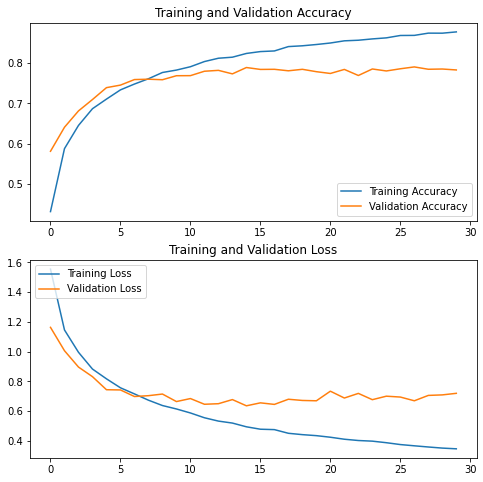

In [5]:
plot_learning_curves()

# Reduce Overfitting with Data Augmentation


In [6]:
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomContrast


data_augmentation = Sequential([
    RandomFlip("horizontal", input_shape=(32, 32, 3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

In [7]:
model = Sequential([
    data_augmentation,
    Rescaling(1./255),
    Conv2D(32, 3, padding="same", activation="relu"),
    Conv2D(32, 3, padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(64, 3, padding="same", activation="relu"),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

epochs = 30

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=64,
)

2022-05-31 11:00:34.879132: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 153600000 exceeds 10% of free system memory.


Epoch 1/30
782/782 [==============================] - 8s 9ms/step - loss: 1.6859 - accuracy: 0.3827 - val_loss: 1.3629 - val_accuracy: 0.5052
Epoch 2/30
782/782 [==============================] - 6s 8ms/step - loss: 1.3879 - accuracy: 0.4966 - val_loss: 1.2435 - val_accuracy: 0.5553
Epoch 3/30
782/782 [==============================] - 6s 8ms/step - loss: 1.2714 - accuracy: 0.5419 - val_loss: 1.1132 - val_accuracy: 0.6001
Epoch 4/30
782/782 [==============================] - 6s 8ms/step - loss: 1.1975 - accuracy: 0.5726 - val_loss: 1.0307 - val_accuracy: 0.6314
Epoch 5/30
782/782 [==============================] - 6s 8ms/step - loss: 1.1410 - accuracy: 0.5926 - val_loss: 1.0916 - val_accuracy: 0.6184
Epoch 6/30
782/782 [==============================] - 7s 8ms/step - loss: 1.1139 - accuracy: 0.6030 - val_loss: 1.1026 - val_accuracy: 0.6065
Epoch 7/30
782/782 [==============================] - 6s 8ms/step - loss: 1.0678 - accuracy: 0.6196 - val_loss: 1.0561 - val_accuracy: 0.6452
Epoch 

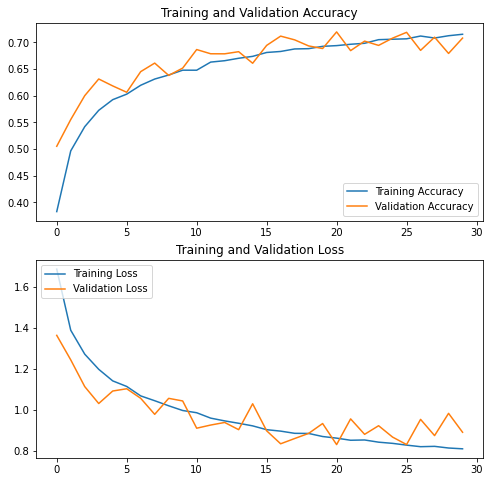

In [8]:
plot_learning_curves()